In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [77]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [78]:
df.rename(columns={'id':'ID', 'gender': 'Gênero', 'age': 'Idade', 'hypertension':'Hipertensão', 'heart_disease':'Doença cardíaca',
                   'ever_married':'Já casou','work_type':'Tipo de trabalho','Residence_type':'Tipo de residência',
                   'avg_glucose_level':'Nível médio de glicose','bmi':'IMC','smoking_status':'Tabagismo','stroke':'Derrame'}, inplace=True)

In [79]:
df.head()

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
df["Gênero"] = df["Gênero"].str.replace("Male","Masculino")
df["Gênero"] = df["Gênero"].str.replace("Female","Feminino")
df["Gênero"] = df["Gênero"].str.replace("Other","Outro")

In [81]:
df["Já casou"] = df["Já casou"].str.replace("Yes","Sim")
df["Já casou"] = df["Já casou"].str.replace("No","Não")

In [82]:
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("children","Criança")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Govt_job","Serv_publi")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Never_worked","Nunca_trab")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Private","Privado")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Self-employed","Autônomo")

In [83]:
df["Tipo de residência"] = df["Tipo de residência"].str.replace("Urban","Urbana")

In [84]:
df["Tabagismo"] = df["Tabagismo"].str.replace("formerly smoked","Já fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("never smoked","Nunca fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("smokes","Fuma")
df["Tabagismo"] = df["Tabagismo"].str.replace("Unknown","Desconhecido")

In [85]:
df.head(6)

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou,1
1,51676,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,Nunca fumou,1
2,31112,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou,1
3,60182,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma,1
4,1665,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou,1
5,56669,Masculino,81.0,0,0,Sim,Privado,Urbana,186.21,29.0,Já fumou,1


Dados Faltantes

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      5110 non-null   int64  
 1   Gênero                  5110 non-null   object 
 2   Idade                   5110 non-null   float64
 3   Hipertensão             5110 non-null   int64  
 4   Doença cardíaca         5110 non-null   int64  
 5   Já casou                5110 non-null   object 
 6   Tipo de trabalho        5110 non-null   object 
 7   Tipo de residência      5110 non-null   object 
 8   Nível médio de glicose  5110 non-null   float64
 9   IMC                     4909 non-null   float64
 10  Tabagismo               5110 non-null   object 
 11  Derrame                 5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [87]:
DT_IMC_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X1 = df[['Idade','Gênero','IMC','Nível médio de glicose']].copy()
X1['Gênero'] = X1['Gênero'].replace({'Masculino':0,'Feminino':1,'Outro':-1}).astype(np.uint8)

Missing = X1[X1['IMC'].isna()]
X1 = X1[~X1['IMC'].isna()]
Y1 = X1.pop('IMC')
DT_IMC_pipe.fit(X1,Y1)
#Usando vairáveis relacionadas com IMC para prevelo, 'Idade','Gênero','Nível médio de glicose'
predicted_IMC = pd.Series(DT_IMC_pipe.predict(Missing[['Idade','Gênero','Nível médio de glicose']]),index=Missing.index)
df.loc[Missing.index,'IMC'] = predicted_IMC

### Criando X, que terá as variáveis que utilizaremos, e y, que terá a variável preditora

In [88]:
X = df.drop(['ID','Derrame'],axis=1)
y = df['Derrame']

In [89]:
X.head()

,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo
0,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou
1,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,45.0,Nunca fumou
2,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou
3,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma
4,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou


### Usando o one hot enconding

In [90]:
X['Já casou'] = X['Já casou'].replace({'Não':0,'Sim':1}).astype(np.uint8)### Usando o one hot enconding
X = pd.get_dummies(X, columns = ['Tipo de trabalho','Tabagismo','Gênero','Tipo de residência'])

In [91]:
X.head()

,Idade,Hipertensão,Doença cardíaca,Já casou,Nível médio de glicose,IMC,Tipo de trabalho_Autônomo,Tipo de trabalho_Criança,Tipo de trabalho_Nunca_trab,Tipo de trabalho_Privado,Tipo de trabalho_Serv_publi,Tabagismo_Desconhecido,Tabagismo_Fuma,Tabagismo_Já fumou,Tabagismo_Nunca fumou,Gênero_Feminino,Gênero_Masculino,Gênero_Outro,Tipo de residência_Rural,Tipo de residência_Urbana
0,67.0,0,1,1,228.69,36.6,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,202.21,45.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,80.0,0,1,1,105.92,32.5,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,49.0,0,0,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0


### Criando o dataframe "base" para o K-fold

In [92]:
base = df.drop(['ID'],axis=1)
base['Já casou'] = base['Já casou'].replace({'Não':0,'Sim':1}).astype(np.uint8)
base = pd.get_dummies(base, columns = ['Tipo de trabalho','Tabagismo','Gênero','Tipo de residência'])

## Usaremos o método de Oversampling para a regressão logística

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

In [94]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train, y_train = ros.fit_resample(X_train, y_train)

In [95]:
logreg_pipeline.fit(X_train,y_train)

pred_logreg = logreg_pipeline.predict(X_test)

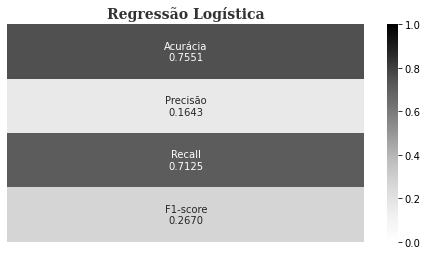

In [96]:
fig = plt.figure(figsize=(8,4))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

scores_names = np.array(['Acurácia','Precisão',
                     'Recall','F1-score'])

logreg_scores = np.array([accuracy_score(y_test,pred_logreg),precision_score(y_test,pred_logreg),
                     recall_score(y_test,pred_logreg),f1_score(y_test,pred_logreg)])

group_scores = ['{:.4f}'.format(value) for value in
                logreg_scores]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(scores_names,group_scores)]
labels = np.asarray(labels).reshape(4,1)
logreg_scores = np.asarray(logreg_scores).reshape(4,1)

sns.heatmap(logreg_scores, annot=labels, fmt='', cmap='Greys',ax=ax0,xticklabels=False,yticklabels=False,vmin=0, vmax=1)
ax0.tick_params(left=False, bottom=False)
ax0.set_title('Regressão Logística',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.show()

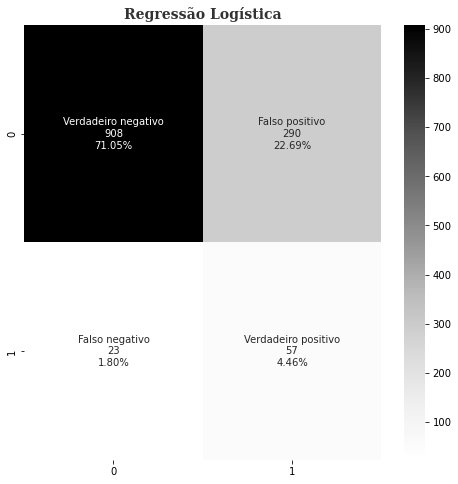

In [97]:
cm_rl = confusion_matrix(y_test, pred_logreg)

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.15, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color

group_names = ['Verdadeiro negativo','Falso positivo','Falso negativo','Verdadeiro positivo']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rl.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rl.flatten()/np.sum(cm_rl)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rl, annot=labels, fmt='', cmap='Greys',ax=ax0)

ax0.set_title('Regressão Logística',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.show()

### Função para fazer o K-fold manualmente

In [98]:
def kfold(base, k = 5):
    '''Essa função retorna, de acordo com a base e o k, os indexes aleatórios para cada partição k.'''
    list_indexes = [] # Lista com os indexes para cada partição. 
    obs_in_each_partition = int(np.round(base.shape[0]/k)) # quantas observações em cada partição
    
    possible_indexes = base.index.values # lista de indexes da base possíveis
    for k_zin in range(1, k):
        new_list_index = np.random.choice(possible_indexes, obs_in_each_partition, replace = False) #escolhendo as obs para o k
        possible_indexes = set(possible_indexes) - set(new_list_index) #tirando as obs do k atual, da lista de indexes possíveis
        possible_indexes = list(possible_indexes) 
        list_indexes.append(new_list_index) # adicionando as obs do k atual, na lista com os indexes para cada partição.
    
    list_indexes.append(np.array(possible_indexes)) # adicionando as obs da última partição (normalmente com menor size)
    return list_indexes   

## Fazendo um gridsearch manual

In [99]:
import warnings
warnings.filterwarnings('ignore')

#Melhor resultado ['0.004772' 'l1' '0.85805468949655' '0.21974044873510098']
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])
"""
ros = RandomOverSampler(random_state=42)

X_train, y_train = ros.fit_resample(X_train, y_train)

re_max,f1_max=0,0
recall_max = np.zeros((5,1))
f1score_max = np.zeros((5,1))
for i in np.logspace(-3, 3, 1000):
    for j in ['l1','l2']:
        logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),
                                            ('LR',LogisticRegression(C=i,penalty=j,
                                                                     solver= 'liblinear',random_state=42))])
        c = -1
        for k in kfold(base):
            # dividindo a base
            base_val = base.iloc[k]
            indexes_train = base.index.difference(base_val.index)
            base_treino = base.iloc[indexes_train] 

            # dividindo em X e y
            X_train, y_train = base_treino.drop(['Derrame'], 1), base_treino.Derrame
            X_train, y_train = ros.fit_resample(X_train, y_train)
            X_val, y_val = base_val.drop(['Derrame'], 1), base_val.Derrame

            # fazendo o modelo
            model_rl = logreg_pipeline.fit(X_train, y_train)

            # predizendo na base de validação normalizada
            pred_logreg = model_rl.predict(X_val)

            # alocando o f1_score do k atual, na lista de perforamnce
            c = c + 1 
            recall_max[c], f1score_max[c] = recall_score(y_val, pred_logreg),f1_score(y_val, pred_logreg)
        recall_mean, f1_mean = recall_max.sum()/5, f1score_max.sum()/5
        if (recall_mean >= re_max) and (f1_mean >= f1_max):
            re_max,f1_max=recall_mean,f1_mean
            print(np.array([round(i,6),j,re_max,f1_max]))
"""

"\nros = RandomOverSampler(random_state=42)\n\nX_train, y_train = ros.fit_resample(X_train, y_train)\n\nre_max,f1_max=0,0\nrecall_max = np.zeros((5,1))\nf1score_max = np.zeros((5,1))\nfor i in np.logspace(-3, 3, 1000):\n    for j in ['l1','l2']:\n        logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),\n                                            ('LR',LogisticRegression(C=i,penalty=j,\n                                                                     solver= 'liblinear',random_state=42))])\n        c = -1\n        for k in kfold(base):\n            # dividindo a base\n            base_val = base.iloc[k]\n            indexes_train = base.index.difference(base_val.index)\n            base_treino = base.iloc[indexes_train] \n\n            # dividindo em X e y\n            X_train, y_train = base_treino.drop(['Derrame'], 1), base_treino.Derrame\n            X_train, y_train = ros.fit_resample(X_train, y_train)\n            X_val, y_val = base_val.drop(['Derrame'], 1), ba

### Observando os pesos das variáveis para o modelo encontrado

#### Pesos do modelo default

In [100]:
#O modelo default tem c=1
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.25, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_def, y_train_def = ros.fit_resample(X_train_def, y_train_def)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train_def, y_train_def)
logreg_tuned_pred = logreg_pipeline.predict(X_test_def)
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg_pipeline.named_steps['LR'].coef_))], axis = 1)

,0,0
0,Idade,1.841204
1,Hipertensão,0.278045
2,Doença cardíaca,0.100287
3,Já casou,-0.091268
4,Nível médio de glicose,0.223734
5,IMC,-0.066866
6,Tipo de trabalho_Autônomo,-0.127198
7,Tipo de trabalho_Criança,0.393608
8,Tipo de trabalho_Nunca_trab,-0.210370
9,Tipo de trabalho_Privado,-0.030774


#### Pesos do modelo ótimo com relação ao recall e f1-score

In [101]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.25, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_def, y_train_def = ros.fit_resample(X_train_def, y_train_def)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])
logreg_pipeline.fit(X_train_def, y_train_def)
logreg_tuned_pred = logreg_pipeline.predict(X_test_def)
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg_pipeline.named_steps['LR'].coef_))], axis = 1)

,0,0
0,Idade,1.317552
1,Hipertensão,0.121021
2,Doença cardíaca,0.038613
3,Já casou,0.000000
4,Nível médio de glicose,0.095486
5,IMC,0.000000
6,Tipo de trabalho_Autônomo,0.000000
7,Tipo de trabalho_Criança,0.000000
8,Tipo de trabalho_Nunca_trab,0.000000
9,Tipo de trabalho_Privado,0.000000


### Gráfico da variação das medidas e dos pesos das variáveis dependendo do valor do parametro de penalidade

In [102]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.25, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_def, y_train_def = ros.fit_resample(X_train_def, y_train_def)

acu = np.zeros((5,1000))
pre = np.zeros((5,1000))
rec = np.zeros((5,1000))
f1 = np.zeros((5,1000))
coefficients = np.zeros((20,1000))
c1 = -1
c2 = -1
re_max,f1_max=0,0
recall_max = np.zeros((5,1))
f1score_max = np.zeros((5,1))
for i in np.logspace(-3, 3, 1000):
    logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=i,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])
    c1 = -1
    c2 = c2 + 1
    print(c2)
    for k in kfold(base):
        # dividindo a base
        base_val = base.iloc[k]
        indexes_train = base.index.difference(base_val.index)
        base_treino = base.iloc[indexes_train] 

        # dividindo em X e y
        X_train, y_train = base_treino.drop(['Derrame'], 1), base_treino.Derrame
        X_train, y_train = ros.fit_resample(X_train, y_train)
        X_val, y_val = base_val.drop(['Derrame'], 1), base_val.Derrame

        # fazendo o modelo
        model_rl = logreg_pipeline.fit(X_train, y_train)

        # predizendo na base de validação normalizada
        y_pred_rl = model_rl.predict(X_val)

        # alocando o f1_score do k atual, na lista de perforamnce
        c1 = c1 + 1 
        acu[c1,c2] = accuracy_score(y_val,y_pred_rl)
        pre[c1,c2] = precision_score(y_val,y_pred_rl)
        rec[c1,c2] = recall_score(y_val,y_pred_rl)
        f1[c1,c2] = f1_score(y_val,y_pred_rl)
    logreg_pipeline.fit(X_train_def, y_train_def)
    coefficients[:,c2] = np.transpose(logreg_pipeline.named_steps['LR'].coef_[0])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

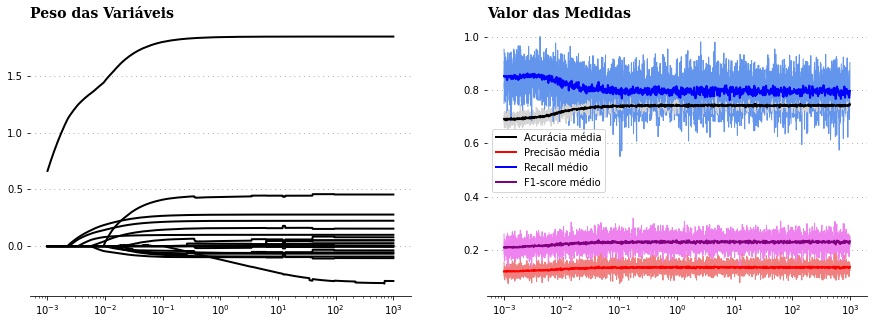

In [103]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2, wspace=0.2,hspace=0)
ax = gs.subplots()

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color) 
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))

labels = np.array(['Acurácia média','Precisão média','Recall médio','F1-score médio'])
colors1 = np.array(['black','red','blue','purple'])
colors2 = np.array(['lightgray','lightcoral','cornflowerblue','violet'])
for i in range(0,20):
    ax[0].plot(np.logspace(-3, 3, 1000), coefficients[i,:], linewidth=2,color='#000000')
    
for i in range(0,5):
    ax[1].plot(np.logspace(-3, 3, 1000), acu[i,:],
               linewidth=1,color=colors2[0])
    ax[1].plot(np.logspace(-3, 3, 1000), pre[i,:],
               linewidth=1,color=colors2[1])
    ax[1].plot(np.logspace(-3, 3, 1000), rec[i,:],
               linewidth=1,color=colors2[2])
    ax[1].plot(np.logspace(-3, 3, 1000), f1[i,:],
               linewidth=1,color=colors2[3])

ax[1].plot(np.logspace(-3, 3, 1000), acu.mean(axis=0),
            linewidth=2, label=labels[0],color=colors1[0])
ax[1].plot(np.logspace(-3, 3, 1000), pre.mean(axis=0),
            linewidth=2, label=labels[1],color=colors1[1])
ax[1].plot(np.logspace(-3, 3, 1000), rec.mean(axis=0),
            linewidth=2, label=labels[2],color=colors1[2])
ax[1].plot(np.logspace(-3, 3, 1000), f1.mean(axis=0),
               linewidth=2, label=labels[3],color=colors1[3])
    
ax[1].legend(loc='best')
    
for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_title('Peso das Variáveis',loc='left',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].set_title('Valor das Medidas',loc='left',fontsize=14,fontfamily='serif',fontweight='bold')


plt.show()

### Comparando o modelo encontrado no gridsearch com o default

In [104]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X, y, test_size=0.25, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_def, y_train_def = ros.fit_resample(X_train_def, y_train_def)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
logreg_pipeline.fit(X_train_def, y_train_def)
logreg_tuned_pred = logreg_pipeline.predict(X_test_def)

print(np.array([accuracy_score(y_test_def, logreg_tuned_pred),precision_score(y_test_def, logreg_tuned_pred),
                     recall_score(y_test_def, logreg_tuned_pred),f1_score(y_test_def, logreg_tuned_pred)]))

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])
logreg_pipeline.fit(X_train_def, y_train_def)
logreg_tuned_pred = logreg_pipeline.predict(X_test_def)

print(np.array([accuracy_score(y_test_def, logreg_tuned_pred),precision_score(y_test_def, logreg_tuned_pred),
                     recall_score(y_test_def, logreg_tuned_pred),f1_score(y_test_def, logreg_tuned_pred)]))

[0.75508607 0.16426513 0.7125     0.26697892]
[0.71361502 0.15625    0.8125     0.26209677]


### Plots das métricas do modelo encontrado

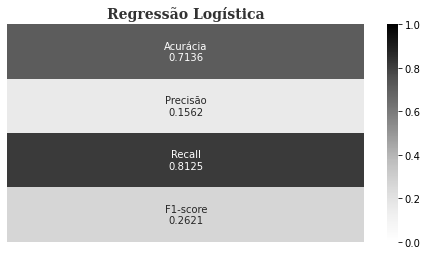

In [105]:
fig = plt.figure(figsize=(8,4))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.25)
ax1 = fig.add_subplot(gs[0, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

scores_names = np.array(['Acurácia','Precisão',
                     'Recall','F1-score'])

logreg_scores = np.array([accuracy_score(y_test_def,logreg_tuned_pred),precision_score(y_test_def,logreg_tuned_pred),
                     recall_score(y_test_def,logreg_tuned_pred),f1_score(y_test_def,logreg_tuned_pred)])

group_scores = ['{:.4f}'.format(value) for value in
                logreg_scores]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(scores_names,group_scores)]
labels = np.asarray(labels).reshape(4,1)
logreg_scores = np.asarray(logreg_scores).reshape(4,1)

sns.heatmap(logreg_scores, annot=labels, fmt='', cmap='Greys',ax=ax1,xticklabels=False,yticklabels=False,vmin=0, vmax=1)
ax1.tick_params(left=False, bottom=False)
ax1.set_title('Regressão Logística',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.show()

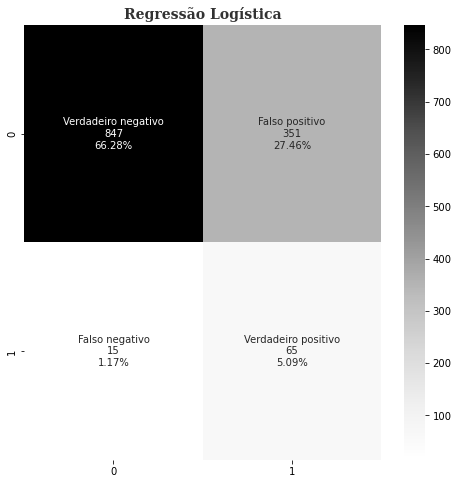

In [106]:
cm_rl = confusion_matrix(y_test_def, logreg_tuned_pred)

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.15, hspace=0.15)
ax1 = fig.add_subplot(gs[0, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color

group_names = ['Verdadeiro negativo','Falso positivo','Falso negativo','Verdadeiro positivo']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rl.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rl.flatten()/np.sum(cm_rl)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rl, annot=labels, fmt='', cmap='Greys',ax=ax1)

ax1.set_title('Regressão Logística',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.show()

## Tunando o Threshold

### Observando os resultados de diferentes thresholds

In [107]:
from sklearn.preprocessing import binarize

for i in range(200,501):
    
    cm1=0
    y_pred1 = logreg_pipeline.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, threshold = i/1000)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('Para',i/1000,'de threshold a matriz de confusão é','\n\n',cm1,'\n\n',
            'Com',cm1[0,0]+cm1[1,1],'predições corretas, ', '\n\n', 
           
            cm1[0,1],'Erros tipo I (Falsos Positivos), ','\n\n',
           
            cm1[1,0],'Erros tipo II (Falsos Negativos), ','\n\n',
           
           'Acurácia: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'F1-score: ', (f1_score(y_test, y_pred2)), '\n\n',
           'Sensibilidade: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Especificidade: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

Para 0.2 de threshold a matriz de confusão é 

 [[457 741]
 [  0  80]] 

 Com 537 predições corretas,  

 741 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.42018779342723006 

 F1-score:  0.17758046614872364 

 Sensibilidade:  1.0 

 Especificidade:  0.3814691151919866 



Para 0.201 de threshold a matriz de confusão é 

 [[458 740]
 [  0  80]] 

 Com 538 predições corretas,  

 740 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.4209702660406886 

 F1-score:  0.17777777777777776 

 Sensibilidade:  1.0 

 Especificidade:  0.3823038397328882 



Para 0.202 de threshold a matriz de confusão é 

 [[458 740]
 [  0  80]] 

 Com 538 predições corretas,  

 740 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.4209702660406886 

 F1-score:  0.17777777777777776 

 Sensibilidade:  1.0 

 Especificidade:  0.3823038397328882 



Para 0.203 de threshold a matriz de confusão

Para 0.25 de threshold a matriz de confusão é 

 [[519 679]
 [  0  80]] 

 Com 599 predições corretas,  

 679 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.46870109546165883 

 F1-score:  0.1907032181168057 

 Sensibilidade:  1.0 

 Especificidade:  0.4332220367278798 



Para 0.251 de threshold a matriz de confusão é 

 [[520 678]
 [  0  80]] 

 Com 600 predições corretas,  

 678 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.4694835680751174 

 F1-score:  0.19093078758949883 

 Sensibilidade:  1.0 

 Especificidade:  0.4340567612687813 



Para 0.252 de threshold a matriz de confusão é 

 [[520 678]
 [  0  80]] 

 Com 600 predições corretas,  

 678 Erros tipo I (Falsos Positivos),  

 0 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.4694835680751174 

 F1-score:  0.19093078758949883 

 Sensibilidade:  1.0 

 Especificidade:  0.4340567612687813 



Para 0.253 de threshold a matriz de confusão

Para 0.282 de threshold a matriz de confusão é 

 [[564 634]
 [  2  78]] 

 Com 642 predições corretas,  

 634 Erros tipo I (Falsos Positivos),  

 2 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5023474178403756 

 F1-score:  0.19696969696969696 

 Sensibilidade:  0.975 

 Especificidade:  0.4707846410684474 



Para 0.283 de threshold a matriz de confusão é 

 [[565 633]
 [  2  78]] 

 Com 643 predições corretas,  

 633 Erros tipo I (Falsos Positivos),  

 2 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5031298904538342 

 F1-score:  0.19721871049304676 

 Sensibilidade:  0.975 

 Especificidade:  0.4716193656093489 



Para 0.284 de threshold a matriz de confusão é 

 [[568 630]
 [  2  78]] 

 Com 646 predições corretas,  

 630 Erros tipo I (Falsos Positivos),  

 2 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5054773082942097 

 F1-score:  0.1979695431472081 

 Sensibilidade:  0.975 

 Especificidade:  0.4741235392320534 



Para 0.285 de threshold a matriz de co

Para 0.309 de threshold a matriz de confusão é 

 [[600 598]
 [  3  77]] 

 Com 677 predições corretas,  

 598 Erros tipo I (Falsos Positivos),  

 3 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5297339593114241 

 F1-score:  0.20397350993377486 

 Sensibilidade:  0.9625 

 Especificidade:  0.5008347245409015 



Para 0.31 de threshold a matriz de confusão é 

 [[600 598]
 [  3  77]] 

 Com 677 predições corretas,  

 598 Erros tipo I (Falsos Positivos),  

 3 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5297339593114241 

 F1-score:  0.20397350993377486 

 Sensibilidade:  0.9625 

 Especificidade:  0.5008347245409015 



Para 0.311 de threshold a matriz de confusão é 

 [[600 598]
 [  3  77]] 

 Com 677 predições corretas,  

 598 Erros tipo I (Falsos Positivos),  

 3 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5297339593114241 

 F1-score:  0.20397350993377486 

 Sensibilidade:  0.9625 

 Especificidade:  0.5008347245409015 



Para 0.312 de threshold a matriz de

Para 0.337 de threshold a matriz de confusão é 

 [[640 558]
 [  5  75]] 

 Com 715 predições corretas,  

 558 Erros tipo I (Falsos Positivos),  

 5 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5594679186228482 

 F1-score:  0.21037868162692847 

 Sensibilidade:  0.9375 

 Especificidade:  0.5342237061769616 



Para 0.338 de threshold a matriz de confusão é 

 [[640 558]
 [  5  75]] 

 Com 715 predições corretas,  

 558 Erros tipo I (Falsos Positivos),  

 5 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5594679186228482 

 F1-score:  0.21037868162692847 

 Sensibilidade:  0.9375 

 Especificidade:  0.5342237061769616 



Para 0.339 de threshold a matriz de confusão é 

 [[641 557]
 [  5  75]] 

 Com 716 predições corretas,  

 557 Erros tipo I (Falsos Positivos),  

 5 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5602503912363067 

 F1-score:  0.21067415730337077 

 Sensibilidade:  0.9375 

 Especificidade:  0.5350584307178631 



Para 0.34 de threshold a matriz de

Para 0.365 de threshold a matriz de confusão é 

 [[672 526]
 [  6  74]] 

 Com 746 predições corretas,  

 526 Erros tipo I (Falsos Positivos),  

 6 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5837245696400626 

 F1-score:  0.21764705882352942 

 Sensibilidade:  0.925 

 Especificidade:  0.5609348914858097 



Para 0.366 de threshold a matriz de confusão é 

 [[672 526]
 [  6  74]] 

 Com 746 predições corretas,  

 526 Erros tipo I (Falsos Positivos),  

 6 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5837245696400626 

 F1-score:  0.21764705882352942 

 Sensibilidade:  0.925 

 Especificidade:  0.5609348914858097 



Para 0.367 de threshold a matriz de confusão é 

 [[672 526]
 [  6  74]] 

 Com 746 predições corretas,  

 526 Erros tipo I (Falsos Positivos),  

 6 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.5837245696400626 

 F1-score:  0.21764705882352942 

 Sensibilidade:  0.925 

 Especificidade:  0.5609348914858097 



Para 0.368 de threshold a matriz de c

Para 0.394 de threshold a matriz de confusão é 

 [[696 502]
 [  7  73]] 

 Com 769 predições corretas,  

 502 Erros tipo I (Falsos Positivos),  

 7 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6017214397496088 

 F1-score:  0.22290076335877862 

 Sensibilidade:  0.9125 

 Especificidade:  0.5809682804674458 



Para 0.395 de threshold a matriz de confusão é 

 [[697 501]
 [  7  73]] 

 Com 770 predições corretas,  

 501 Erros tipo I (Falsos Positivos),  

 7 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6025039123630673 

 F1-score:  0.22324159021406728 

 Sensibilidade:  0.9125 

 Especificidade:  0.5818030050083473 



Para 0.396 de threshold a matriz de confusão é 

 [[698 500]
 [  7  73]] 

 Com 771 predições corretas,  

 500 Erros tipo I (Falsos Positivos),  

 7 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6032863849765259 

 F1-score:  0.22358346094946402 

 Sensibilidade:  0.9125 

 Especificidade:  0.5826377295492488 



Para 0.397 de threshold a matriz d

 Com 815 predições corretas,  

 455 Erros tipo I (Falsos Positivos),  

 8 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6377151799687011 

 F1-score:  0.23723228995057663 

 Sensibilidade:  0.9 

 Especificidade:  0.6202003338898163 



Para 0.425 de threshold a matriz de confusão é 

 [[744 454]
 [  8  72]] 

 Com 816 predições corretas,  

 454 Erros tipo I (Falsos Positivos),  

 8 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6384976525821596 

 F1-score:  0.23762376237623764 

 Sensibilidade:  0.9 

 Especificidade:  0.6210350584307178 



Para 0.426 de threshold a matriz de confusão é 

 [[745 453]
 [  8  72]] 

 Com 817 predições corretas,  

 453 Erros tipo I (Falsos Positivos),  

 8 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6392801251956182 

 F1-score:  0.23801652892561986 

 Sensibilidade:  0.9 

 Especificidade:  0.6218697829716193 



Para 0.427 de threshold a matriz de confusão é 

 [[746 452]
 [  8  72]] 

 Com 818 predições corretas,  

 452 Erros 

Para 0.452 de threshold a matriz de confusão é 

 [[779 419]
 [  9  71]] 

 Com 850 predições corretas,  

 419 Erros tipo I (Falsos Positivos),  

 9 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6651017214397497 

 F1-score:  0.24912280701754383 

 Sensibilidade:  0.8875 

 Especificidade:  0.6502504173622704 



Para 0.453 de threshold a matriz de confusão é 

 [[780 418]
 [  9  71]] 

 Com 851 predições corretas,  

 418 Erros tipo I (Falsos Positivos),  

 9 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6658841940532081 

 F1-score:  0.24956063268892795 

 Sensibilidade:  0.8875 

 Especificidade:  0.6510851419031719 



Para 0.454 de threshold a matriz de confusão é 

 [[782 416]
 [  9  71]] 

 Com 853 predições corretas,  

 416 Erros tipo I (Falsos Positivos),  

 9 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6674491392801252 

 F1-score:  0.25044091710758376 

 Sensibilidade:  0.8875 

 Especificidade:  0.6527545909849749 



Para 0.455 de threshold a matriz d

Para 0.482 de threshold a matriz de confusão é 

 [[819 379]
 [ 11  69]] 

 Com 888 predições corretas,  

 379 Erros tipo I (Falsos Positivos),  

 11 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6948356807511737 

 F1-score:  0.26136363636363635 

 Sensibilidade:  0.8625 

 Especificidade:  0.6836393989983306 



Para 0.483 de threshold a matriz de confusão é 

 [[820 378]
 [ 11  69]] 

 Com 889 predições corretas,  

 378 Erros tipo I (Falsos Positivos),  

 11 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6956181533646323 

 F1-score:  0.26185958254269454 

 Sensibilidade:  0.8625 

 Especificidade:  0.6844741235392321 



Para 0.484 de threshold a matriz de confusão é 

 [[821 377]
 [ 11  69]] 

 Com 890 predições corretas,  

 377 Erros tipo I (Falsos Positivos),  

 11 Erros tipo II (Falsos Negativos),  

 Acurácia:  0.6964006259780907 

 F1-score:  0.2623574144486693 

 Sensibilidade:  0.8625 

 Especificidade:  0.6853088480801336 



Para 0.485 de threshold a matriz

### Gráfico da relação entre precisão e recall com o threshold e gráfico da curva ROC

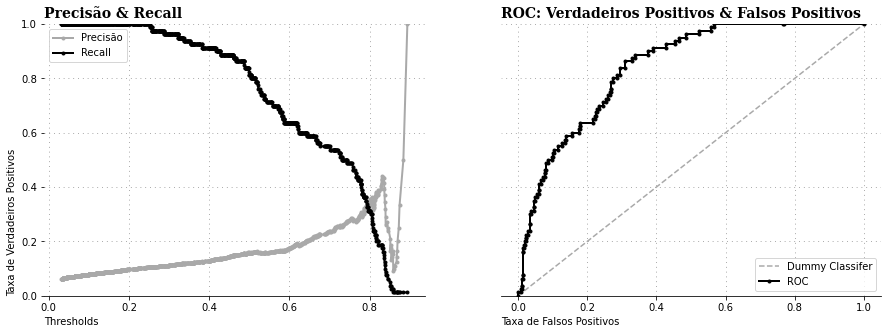

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test_def))]
lr_probs = logreg_pipeline.predict_proba(X_test_def)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test_def, ns_probs)
lr_auc = roc_auc_score(y_test_def, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_def, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_def, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_test_def)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test_def, y_scores)



# Plots

fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2, wspace=0.2,hspace=0)
ax = gs.subplots()

background_color = "#ffffff"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color) 
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))


ax[0].plot(thresholds, precisions[:-1], marker='.', linewidth=2, label='Precisão',color='#a9a9a9')
ax[0].legend(loc='best')
ax[0].plot(thresholds, recalls[:-1], marker='.', linewidth=2,label='Recall',color='#000000')
ax[0].legend(loc='best')
ax[0].set_ylabel('Taxa de Verdadeiros Positivos',loc='bottom')
ax[0].set_xlabel('Thresholds',loc='left')
#plt.legend(loc='center left')
ax[0].set_ylim([0,1])
ax[0].grid(color='gray', linestyle=':', axis='both', zorder=0,  dashes=(1,5))


# plot the roc curve for the model
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='#a9a9a9')
ax[1].legend(loc='best')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,label='ROC',color='#000000')
ax[1].legend(loc='best')
ax[1].set_xlabel('Taxa de Falsos Positivos',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])
ax[1].grid(color='gray', linestyle=':', axis='both', zorder=0,  dashes=(1,5))

for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)


ax[0].set_title('Precisão & Recall',loc='left',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].set_title('ROC: Verdadeiros Positivos & Falsos Positivos',loc='left',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()

#### Área abaixo da curva 

In [109]:
roc_auc_score(y_test_def, logreg_tuned_pred)

0.7597558430717863

## Tirando dados inúteis

#### Como sabemos que o modelo ótimo encontrado só não zera as variáveis 'Idade','Hipertensão','Doença cardíaca','Nível médio de glicose', não precisamos das demais no treinamento. Assim, usaremos uma base com somente as variáveis não zeradas pelo modelo

In [110]:
X_empty = df[['Idade','Hipertensão','Doença cardíaca','Nível médio de glicose']].copy()

In [111]:
y_empty = df['Derrame'].copy()

In [112]:
X_train_empty, X_test_empty, y_train_empty, y_test_empty = train_test_split(X_empty, y_empty, test_size=0.25, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_empty, y_train_empty = ros.fit_resample(X_train_empty, y_train_empty)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])
logreg_pipeline.fit(X_train_empty, y_train_empty)
logreg_tuned_pred = logreg_pipeline.predict(X_test_empty)

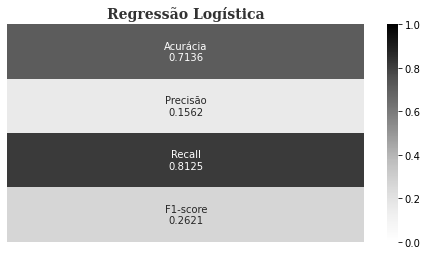

In [113]:
fig = plt.figure(figsize=(8,4))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#ffffff"
fig.patch.set_facecolor(background_color)

scores_names = np.array(['Acurácia','Precisão',
                     'Recall','F1-score'])

logreg_scores = np.array([accuracy_score(y_test_empty,logreg_tuned_pred),precision_score(y_test_empty,logreg_tuned_pred),
                     recall_score(y_test_empty,logreg_tuned_pred),f1_score(y_test_empty,logreg_tuned_pred)])

group_scores = ['{:.4f}'.format(value) for value in
                logreg_scores]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(scores_names,group_scores)]
labels = np.asarray(labels).reshape(4,1)
logreg_scores = np.asarray(logreg_scores).reshape(4,1)

sns.heatmap(logreg_scores, annot=labels, fmt='', cmap='Greys',ax=ax0,xticklabels=False,yticklabels=False,vmin=0, vmax=1)
ax0.tick_params(left=False, bottom=False)
ax0.set_title('Regressão Logística',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

plt.show()

In [114]:
roc_auc_score(y_test_empty, logreg_tuned_pred)

0.7597558430717863